In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import celerite
from celerite import terms

In [3]:
parameter_vector = np.loadtxt('parameter_vector.txt')

In [4]:
nterms = len(parameter_vector)//3

kernel = terms.SHOTerm(log_S0=0, log_omega0=0, log_Q=0) 

for term in range(nterms-1): 
    kernel += terms.SHOTerm(log_S0=0, log_omega0=0, log_Q=0)

kernel.set_parameter_vector(parameter_vector)

In [52]:
gp = celerite.GP(kernel)

# Naturally at 1 second cadence, skip to one minute cadence : 
x = np.arange(0, 1e6, 60) 
gp.compute(x, check_sorted=False)

y = gp.sample(500)

In [53]:
y_concatenated = []

for i, yi in enumerate(y): 
    xi = np.arange(len(yi))
    fit = np.polyval(np.polyfit(xi - xi.mean(), yi, 1), xi-xi.mean())
    yi -= fit
    
    if i == 0: 
        y_concatenated.append(yi)
    else: 
        offset = yi[0] - y_concatenated[i-1][-1]
        y_concatenated.append(yi - offset)
y_concatenated = np.hstack(y_concatenated)

Text(0,0.5,'Flux [ppm]')

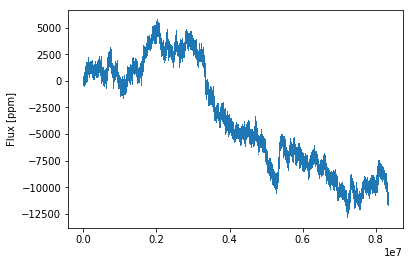

In [56]:
plt.plot(1e6 * y_concatenated, ',')
plt.ylabel('Flux [ppm]')

(0.01, 10000.0)

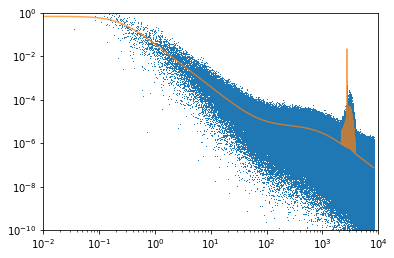

In [55]:
from scipy.signal import periodogram

ftest, Ptest = periodogram(y_concatenated, fs=1/60)

plt.loglog(ftest * 1e6, Ptest, ',')
plt.loglog(ftest * 1e6, 2*np.pi*kernel.get_psd(2*np.pi*ftest), alpha=0.7)
plt.ylim([1e-10, 1e0])
# plt.ylim([1e-8, 1e-5])
plt.xlim([1e-2, 1e4])
# plt.xlim([2000, 4000])